In [10]:
import pandas as pd
import os
import glob

# =========================
# FOLDER PATH
# =========================
input_folder = "fundamental_data"      # folder containing raw CSVs
output_folder = "clean_fundamental_data"

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# =========================
# INDICATORS TO KEEP
# =========================
relevant_indicators = [
    "Net Sales/Income from operations",
    "Total Income From Operations",
    "Net Profit/(Loss) For the Period",
    "P/L Before Tax",
    "Interest",
    "Depreciation",
    "Basic EPS",
    "Equity Share Capital"
]

# =========================
# PROCESS ALL CSV FILES
# =========================
files = glob.glob(os.path.join(input_folder, "*.csv"))

for input_file in files:

    print("Processing:", input_file)

    df = pd.read_csv(input_file)

    # Clean column names
    df.columns = df.columns.str.strip()

    # Filter relevant rows
    filtered = df[df["Indicators"].isin(relevant_indicators)]

    # Transpose
    filtered.set_index("Indicators", inplace=True)
    clean_df = filtered.T

    # Reset index
    clean_df.reset_index(inplace=True)
    clean_df.rename(columns={"index": "Quarter"}, inplace=True)

    # =========================
    # OUTPUT FILE NAME
    # =========================
    filename = os.path.basename(input_file)
    output_file = os.path.join(output_folder, filename.replace(".csv", "_clean.csv"))

    clean_df.to_csv(output_file, index=False)

    print("✅ Saved:", output_file)

print("\n🎉 All files processed successfully!")


Processing: fundamental_data\reliance_fundamentals.csv
✅ Saved: clean_fundamental_data\reliance_fundamentals_clean.csv

🎉 All files processed successfully!


In [11]:
import yfinance as yf
import pandas as pd
import os

# =========================
# STOCK LIST
# =========================
stocks = {
    "RELIANCE": "RELIANCE.NS",
    "HDFCBANK": "HDFCBANK.NS",
    "INFY": "INFY.NS",
    "M&M": "M&M.NS",
    "BHARTIARTL": "BHARTIARTL.NS",
    "HUL": "HINDUNILVR.NS"
}

start_date = "2020-01-01"
end_date = "2026-01-01"

os.makedirs("market_data/train", exist_ok=True)
os.makedirs("market_data/test", exist_ok=True)

# =========================
# LOOP THROUGH STOCKS
# =========================
for name, ticker in stocks.items():

    print(f"\nDownloading {name}...")

    data = yf.download(
        ticker,
        start=start_date,
        end=end_date,
        auto_adjust=False
    )

    data.reset_index(inplace=True)

    # Split
    train = data[data["Date"] < "2025-10-01"]
    test = data[data["Date"] >= "2025-10-01"]

    # Save
    train.to_csv(f"market_data/train/{name}_train.csv", index=False)
    test.to_csv(f"market_data/test/{name}_test.csv", index=False)

    print(f"✅ Saved {name}")

print("\n🎉 All market data downloaded!")


[*********************100%***********************]  1 of 1 completed


✅ Saved RELIANCE



[*********************100%***********************]  1 of 1 completed


✅ Saved HDFCBANK



[*********************100%***********************]  1 of 1 completed


✅ Saved INFY



[*********************100%***********************]  1 of 1 completed


✅ Saved M&M



[*********************100%***********************]  1 of 1 completed


✅ Saved BHARTIARTL



[*********************100%***********************]  1 of 1 completed

✅ Saved HUL

🎉 All market data downloaded!


,date,adj close,close,high,low,open,volume
0,2020-01-01,605.529296875,639.299988,640.0,635.2999877929688,638.0499877929688,3673698
1,2020-01-02,609.38916015625,643.375000,644.0,639.5,639.5,6137166
2,2020-01-03,600.6988525390625,634.200012,642.5,631.7999877929688,641.0999755859375,10855550
3,2020-01-06,587.6988525390625,620.474976,630.9000244140625,618.0,630.0,10890186
4,2020-01-07,597.0047607421875,630.299988,635.7249755859375,626.125,629.4500122070312,14724494


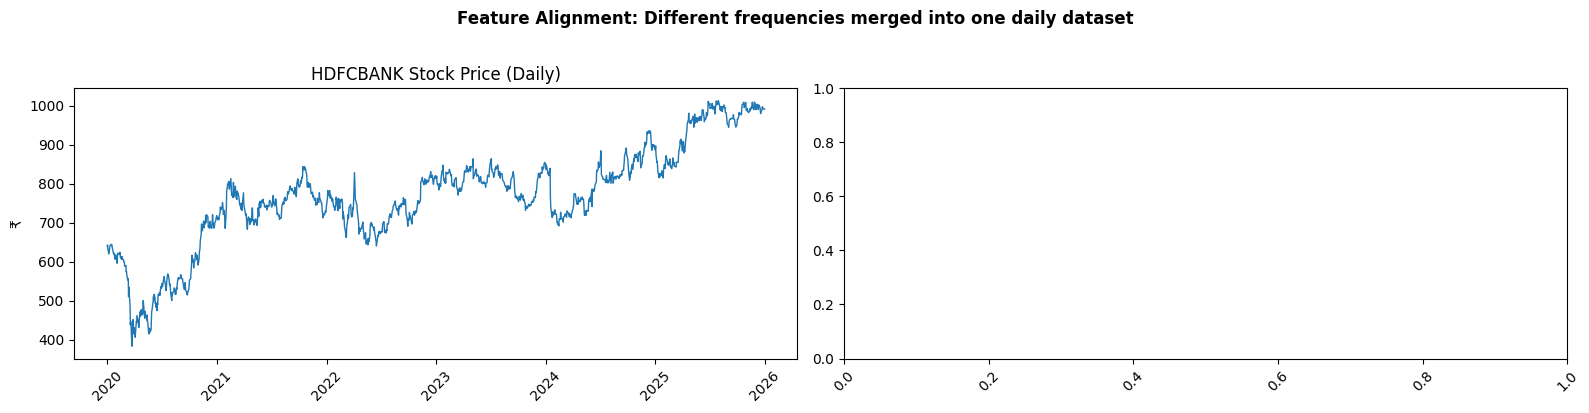

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# ============================================================
# 1. LOAD AND PREPARE DATA
# ============================================================
name = "HDFCBANK"

train_path = f"market_data/train/{name}_train.csv"
test_path = f"market_data/test/{name}_test.csv"

if os.path.exists(train_path) and os.path.exists(test_path):
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    df = pd.concat([df_train, df_test], ignore_index=True)
else:
    print("Files not found! Please run your download script first.")
    raise SystemExit

# ------------------------------------------------------------
# CLEANING
# ------------------------------------------------------------

# Make column names lowercase
df.columns = [c.lower() for c in df.columns]

# Remove accidental ticker rows
df = df[df['close'] != 'HDFCBANK.NS']

# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert price column to numeric
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Drop bad rows
df = df.dropna(subset=['date', 'close'])

# VERY IMPORTANT: sort by date
df = df.sort_values('date')

# Reset index (optional but clean)
df = df.reset_index(drop=True)

display(df.head())

# ============================================================
# 2. PLOTTING
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Main stock price plot
axes[0].plot(df['date'], df['close'], linewidth=1)
axes[0].set_title('HDFCBANK Stock Price (Daily)')
axes[0].set_ylabel('₹')

# Nice date formatting
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate ticks
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.suptitle(
    'Feature Alignment: Different frequencies merged into one daily dataset',
    fontsize=12,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()


<>:20: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:20: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
C:\Users\Shreyas_new_laptop\AppData\Local\Temp\ipykernel_9812\3528647212.py:20: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
  india_10y = pd.read_csv("macro_data\India 10-Year Bond Yield Historical Data.csv")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INR=X,INR=X,INR=X,INR=X,INR=X
Date,,,,,
2020-01-01,71.275803,71.430000,71.029999,71.275803,0
2020-01-02,71.025002,71.405502,71.025002,71.025002,0
2020-01-03,71.415001,71.995003,71.229797,71.415001,0
2020-01-06,71.731003,72.190002,71.703003,71.720001,0
2020-01-07,71.787003,72.032600,71.668999,72.019997,0


,Date,Price,Open,High,Low,Change %
0,31-12-2025,6.588,6.576,6.604,6.569,0.18%
1,30-12-2025,6.576,6.595,6.602,6.576,-0.29%
2,29-12-2025,6.595,6.560,6.595,6.560,0.53%
3,26-12-2025,6.560,6.538,6.574,6.537,0.34%
4,25-12-2025,6.538,6.538,6.538,6.538,0.00%


,Period,Forward Premia of US$ 1-month (%),Forward Premia of US$ 3-month (%),Forward Premia of US$ 6-month (%),Reverse Repo Rate (%),Marginal Standing Facility (MSF) Rate (%),Bank Rate (%),Base Rate (%),91-Day Treasury Bill (Primary) Yield (%),182-Day Treasury Bill (Primary) Yield (%),364-Day Treasury Bill (Primary) Yield (%),10-Year G-Sec Yield (FBIL) (%),Cash Reserve Ratio (%),Statutory Liquidity Ratio (%),Policy Repo Rate (%),Standing Deposit Facility (SDF) Rate (%),Foreign Exchange Reserves \r\n(US $ Million)
0,02-Jan-2026,2.57,2.90,2.55,3.35,5.5,5.5,8.35,-,-,-,6.69,3.0,18.0,5.25,5.00,"6,86,800.98"
1,26-Dec-2025,5.24,3.52,3.08,3.35,5.5,5.5,8.35,5.26,5.48,5.54,6.65,3.0,18.0,5.25,5.00,"6,96,610.43"
2,19-Dec-2025,5.05,3.63,3.21,3.35,5.5,5.5,8.35,5.28,5.50,5.50,6.67,3.0,18.0,5.25,5.00,"6,93,317.71"
3,12-Dec-2025,3.55,2.93,2.84,3.35,5.5,5.5,8.35,5.27,5.48,5.49,6.66,3.0,18.0,5.25,5.00,"6,88,949.39"
4,05-Dec-2025,2.92,2.65,2.56,3.35,5.5,5.5,8.35,5.35,5.53,5.55,6.55,3.0,18.0,5.25,5.00,"6,87,260.37"


C:\Users\Shreyas_new_laptop\AppData\Local\Temp\ipykernel_9812\3528647212.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  crude = yf.download("BZ=F", start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BZ=F,BZ=F,BZ=F,BZ=F,BZ=F
Date,,,,,
2020-01-02,66.250000,66.570000,65.730003,66.470001,25810
2020-01-03,68.599998,69.480003,66.220001,66.290001,78848
2020-01-06,68.910004,70.720001,68.190002,69.070000,51933
2020-01-07,68.269997,68.739998,67.650002,68.580002,41178
2020-01-08,65.440002,71.989998,64.940002,68.470001,85232


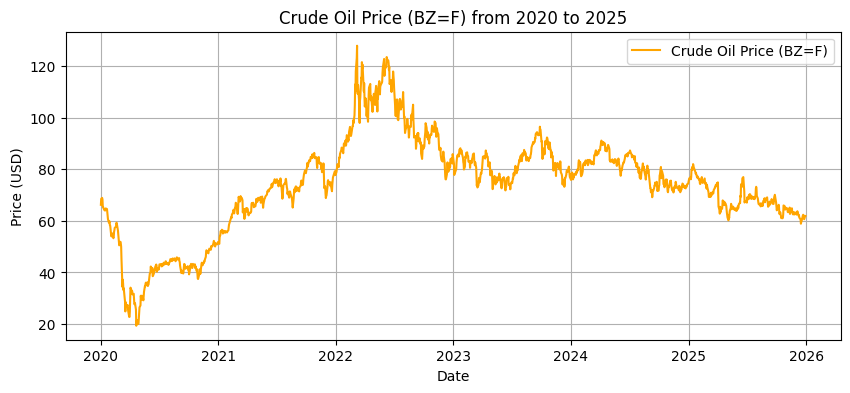

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start = "2020-01-01"
end   = "2025-12-31"

usd_inr = yf.download("INR=X", start=start, end=end, auto_adjust=True)
display(usd_inr.head())

usd_inr = usd_inr[['Close']]
usd_inr.columns = ['USDINR']

# Convert to log returns (stationarity)
usd_inr['USDINR_ret'] = np.log(usd_inr['USDINR']).diff()

usd_inr = usd_inr[['USDINR_ret']]

india_10y = pd.read_csv("macro_data\India 10-Year Bond Yield Historical Data.csv")
display(india_10y.head())

rbi_macro_data = pd.read_csv(r"macro_data\rbi_macro_indicators.csv")
display(rbi_macro_data.head())

crude = yf.download("BZ=F", start=start, end=end)
display(crude.head())
crude = crude[['Close']]

#plot crude price
plt.figure(figsize=(10, 4))
plt.plot(crude.index, crude['Close'], label='Crude Oil Price (BZ=F)', color='orange')
plt.title('Crude Oil Price (BZ=F) from 2020 to 2025')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


crude.columns = ['CRUDE']

crude['CRUDE_ret'] = np.log(crude['CRUDE']).diff()

crude = crude[['CRUDE_ret']]
